In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## q1


In [2]:
T = 50
rho = 0.8
tau = 1
sigma = 0.1

In [3]:
def gaussian_SSM(n, rho, tau, sigma):
    X = np.zeros(n)
    Y = np.zeros(n)
    X[0] = np.random.normal(0,1)
    Y[0] = np.random.normal(X[0], sigma)
    
    for i in range(1,n):
        X[i] = np.random.normal(rho*X[i-1], tau)
        Y[i] = np.random.normal(X[i], sigma)
        
        
        
    return(X,Y)

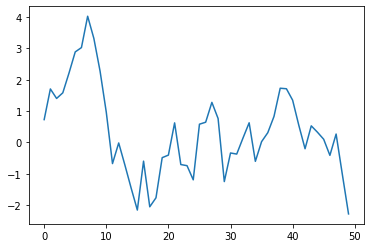

In [4]:
x1, y1 = gaussian_SSM(50, 0.8, 1, 0.1)
plt.plot(x1)

## q2. Kalman Filter

In [5]:
def kalman_filter(n, rho, tau, sig):
    X = np.zeros(n)
    Y = np.zeros(n)
    X[0] = np.random.normal(0,1)
    Y[0] = np.random.normal(X[0], sig)
    # initialize means and variances
    mu_pred = np.zeros(n)
    sigma_pred = np.ones(n)
    m = np.zeros(n)
    S = np.ones(n)
    mu_update = np.zeros(n)
    sigma_update = np.ones(n)
    
    for i in range(1,T):
        X[i] = np.random.normal(rho*X[i], tau)
        Y[i] = np.random.normal(X[i], sig)
        
    for i in range(T):
        if i!=0:
            mu_pred[i] = rho*mu_update[i-1]
            sigma_pred[i] = rho**2*sigma_update[i-1] + tau**2
#         mu_pred[i] = rho * mu_update[i-1]
#         sigma_pred[i] = rho**2 * sigma_update[i-1] + tau**2
        
        m[i] = mu_pred[i]
        S[i] = sigma_pred[i] + sig**2
        
        gain = sigma_pred[i]/S[i]
        mu_update[i] = mu_pred[i] + gain * (Y[i]-m[i])
        sigma_update[i] = sigma_pred[i] - gain * sigma_pred[i]
        
    return(X,Y,mu_pred, sigma_pred, m, S, mu_update, sigma_update)


# def Kalman(T, rho, tau, sigma):
#     def g(x):
#         return x+sigma*np.random.normal(size=1)

#     x_star = np.zeros(T)
#     y = np.zeros(T)
#     x_star[0] = np.random.normal(size=1)
#     y[0] = g(x_star[0])

#     for i in range(1,T):
#         x_star[i] = rho*x_star[i-1]+tau*np.random.normal(size=1)
#         y[i] = g(x_star[i])
        
#     mu_pred = np.zeros(T)
#     mu_update = np.zeros(T)
#     m = np.zeros(T)
#     S = np.ones(T)
#     K = np.ones(T)
#     sigma_pred = np.ones(T)
#     sigma_update = np.ones(T)

#     for i in range(T):
#         if i!=0:
#             mu_pred[i] = rho*mu_update[i-1]
#             sigma_pred[i] = rho**2*sigma_update[i-1] + tau**2
#         m[i] = mu_pred[i]
#         S[i] = sigma_pred[i] + sigma**2
#         K[i] = sigma_pred[i]/S[i]
#         mu_update[i] = mu_pred[i] + K[i]*(y[i]-m[i])
#         sigma_update[i] = sigma_pred[i] - K[i]*sigma_pred[i]
#     return np.vstack((x_star, y, mu_pred, sigma_pred, m, S, K, mu_update, sigma_update))
# # %%
# known = Kalman(50, 0.8, 1, 0.1)
# fig, (ax1, ax2) = plt.subplots(1,2)
# true = ax1.plot(known[0,:], "--",label="true")
# predict = ax1.plot(known[2,:],label="predict")

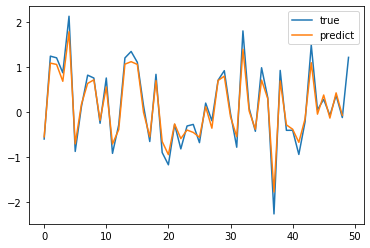

In [6]:
X2,Y2,mu_pred2, sigma_pred2, m2, S2, mu_update2, sigma_update2 = kalman_filter(50, 0.8, 1, 0.1)

plt.plot(X2,label="true")
plt.plot(mu_pred2[1:],label="predict")
plt.legend()